In [0]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install bokeh
!pip install geopandas
!pip install pandas
!pip install folium
!pip install colorcet
import pandas as pd
import matplotlib.pyplot as plt

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.0.3)
Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (40.8.0)
    100% |████████████████████████████████| 931kB 21.0MB/s 
    100% |████████████████████████████████| 17.9MB 1.7MB/s 
    100% |████████████████████████████████| 20.6MB 1.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch
    100% |████████████████████████████████| 1.4MB 13.7MB/s 
    100% |████████████████████████████████| 71kB 16.1MB/s 


In [0]:
w = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2KA7bYjFYRIOCmc3-RUCmQb5C0Brxo9Kke2vapqGVCxY8qRiLYFMCntbB-da_jrwwHc-YosA3h5Wk/pub?output=csv", header = 0)
ws = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSEqE7cIvDDoMbgZHPF0V0ZKjzyXqSANmKqd4wwccGhY_QQuWVCd-25Uyx-eAjlfBPt3wAko3efZuRA/pub?output=csv", header = 0)
w

,Temperature,Humidity,Wind Speed,Wind Gust,Daily Rain,Monthly Rain,Yearly Rain,UV (0-11+),Timestamp,Date,Date(Months),Date(Days),Date(Years),Time
0,69.3,99,0.0,0.0,0,2.34,8.75,0,2018-05-17T05:20:00-04:00,5/17/2018,5,17,2018,05:20:00-04:00
1,85.6,99,0.0,2.5,0,2.34,8.75,0,2018-05-17T05:40:00-04:00,5/17/2018,5,17,2018,05:40:00-04:00
2,87.4,47,0.0,2.5,0,2.34,8.75,0,2018-05-17T06:10:00-04:00,5/17/2018,5,17,2018,06:10:00-04:00
3,84.6,52,0.9,2.5,0,0.08,15.74,0,2018-05-17T06:40:00-04:00,5/17/2018,5,17,2018,06:40:00-04:00
4,84.7,52,0.0,0.0,0,0.08,15.74,6,2018-06-07T16:16:00-04:00,6/7/2018,6,7,2018,16:16:00-04:00
5,83.8,56,0.0,4.9,0,0.08,15.74,3,2018-06-07T16:45:00-04:00,6/7/2018,6,7,2018,16:45:00-04:00
6,81.5,65,0.0,0.0,0,0.08,15.74,3,2018-06-07T17:15:00-04:00,6/7/2018,6,7,2018,17:15:00-04:00
7,79.7,7,0.0,0.0,0,0.08,15.74,2,2018-06-07T17:45:00-04:00,6/7/2018,6,7,2018,17:45:00-04:00
8,78.8,73,0.0,0.0,0,0.08,15.74,1,2018-06-07T18:15:00-04:00,6/7/2018,6,7,2018,18:15:00-04:00
9,77.0,76,0.0,0.0,0,0.08,15.74,1,2018-06-07T18:45:00-04:00,6/7/2018,6,7,2018,18:45:00-04:00


In [0]:
from numpy import linspace
from scipy.stats.kde import gaussian_kde
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure, output_notebook
from bokeh.sampledata.perceptions import probly
import colorcet as cc

def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = ['January','February','March','April','May','June','July','August','September','October','November','December']
cats = list(range(1,13))

palette = [cc.rainbow[i*18] for i in range(13)]

x = w['Temperature']

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

    
    
    
    
p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker
p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None
p.y_range.range_padding = 0.12

show(p)
#output_notebook()

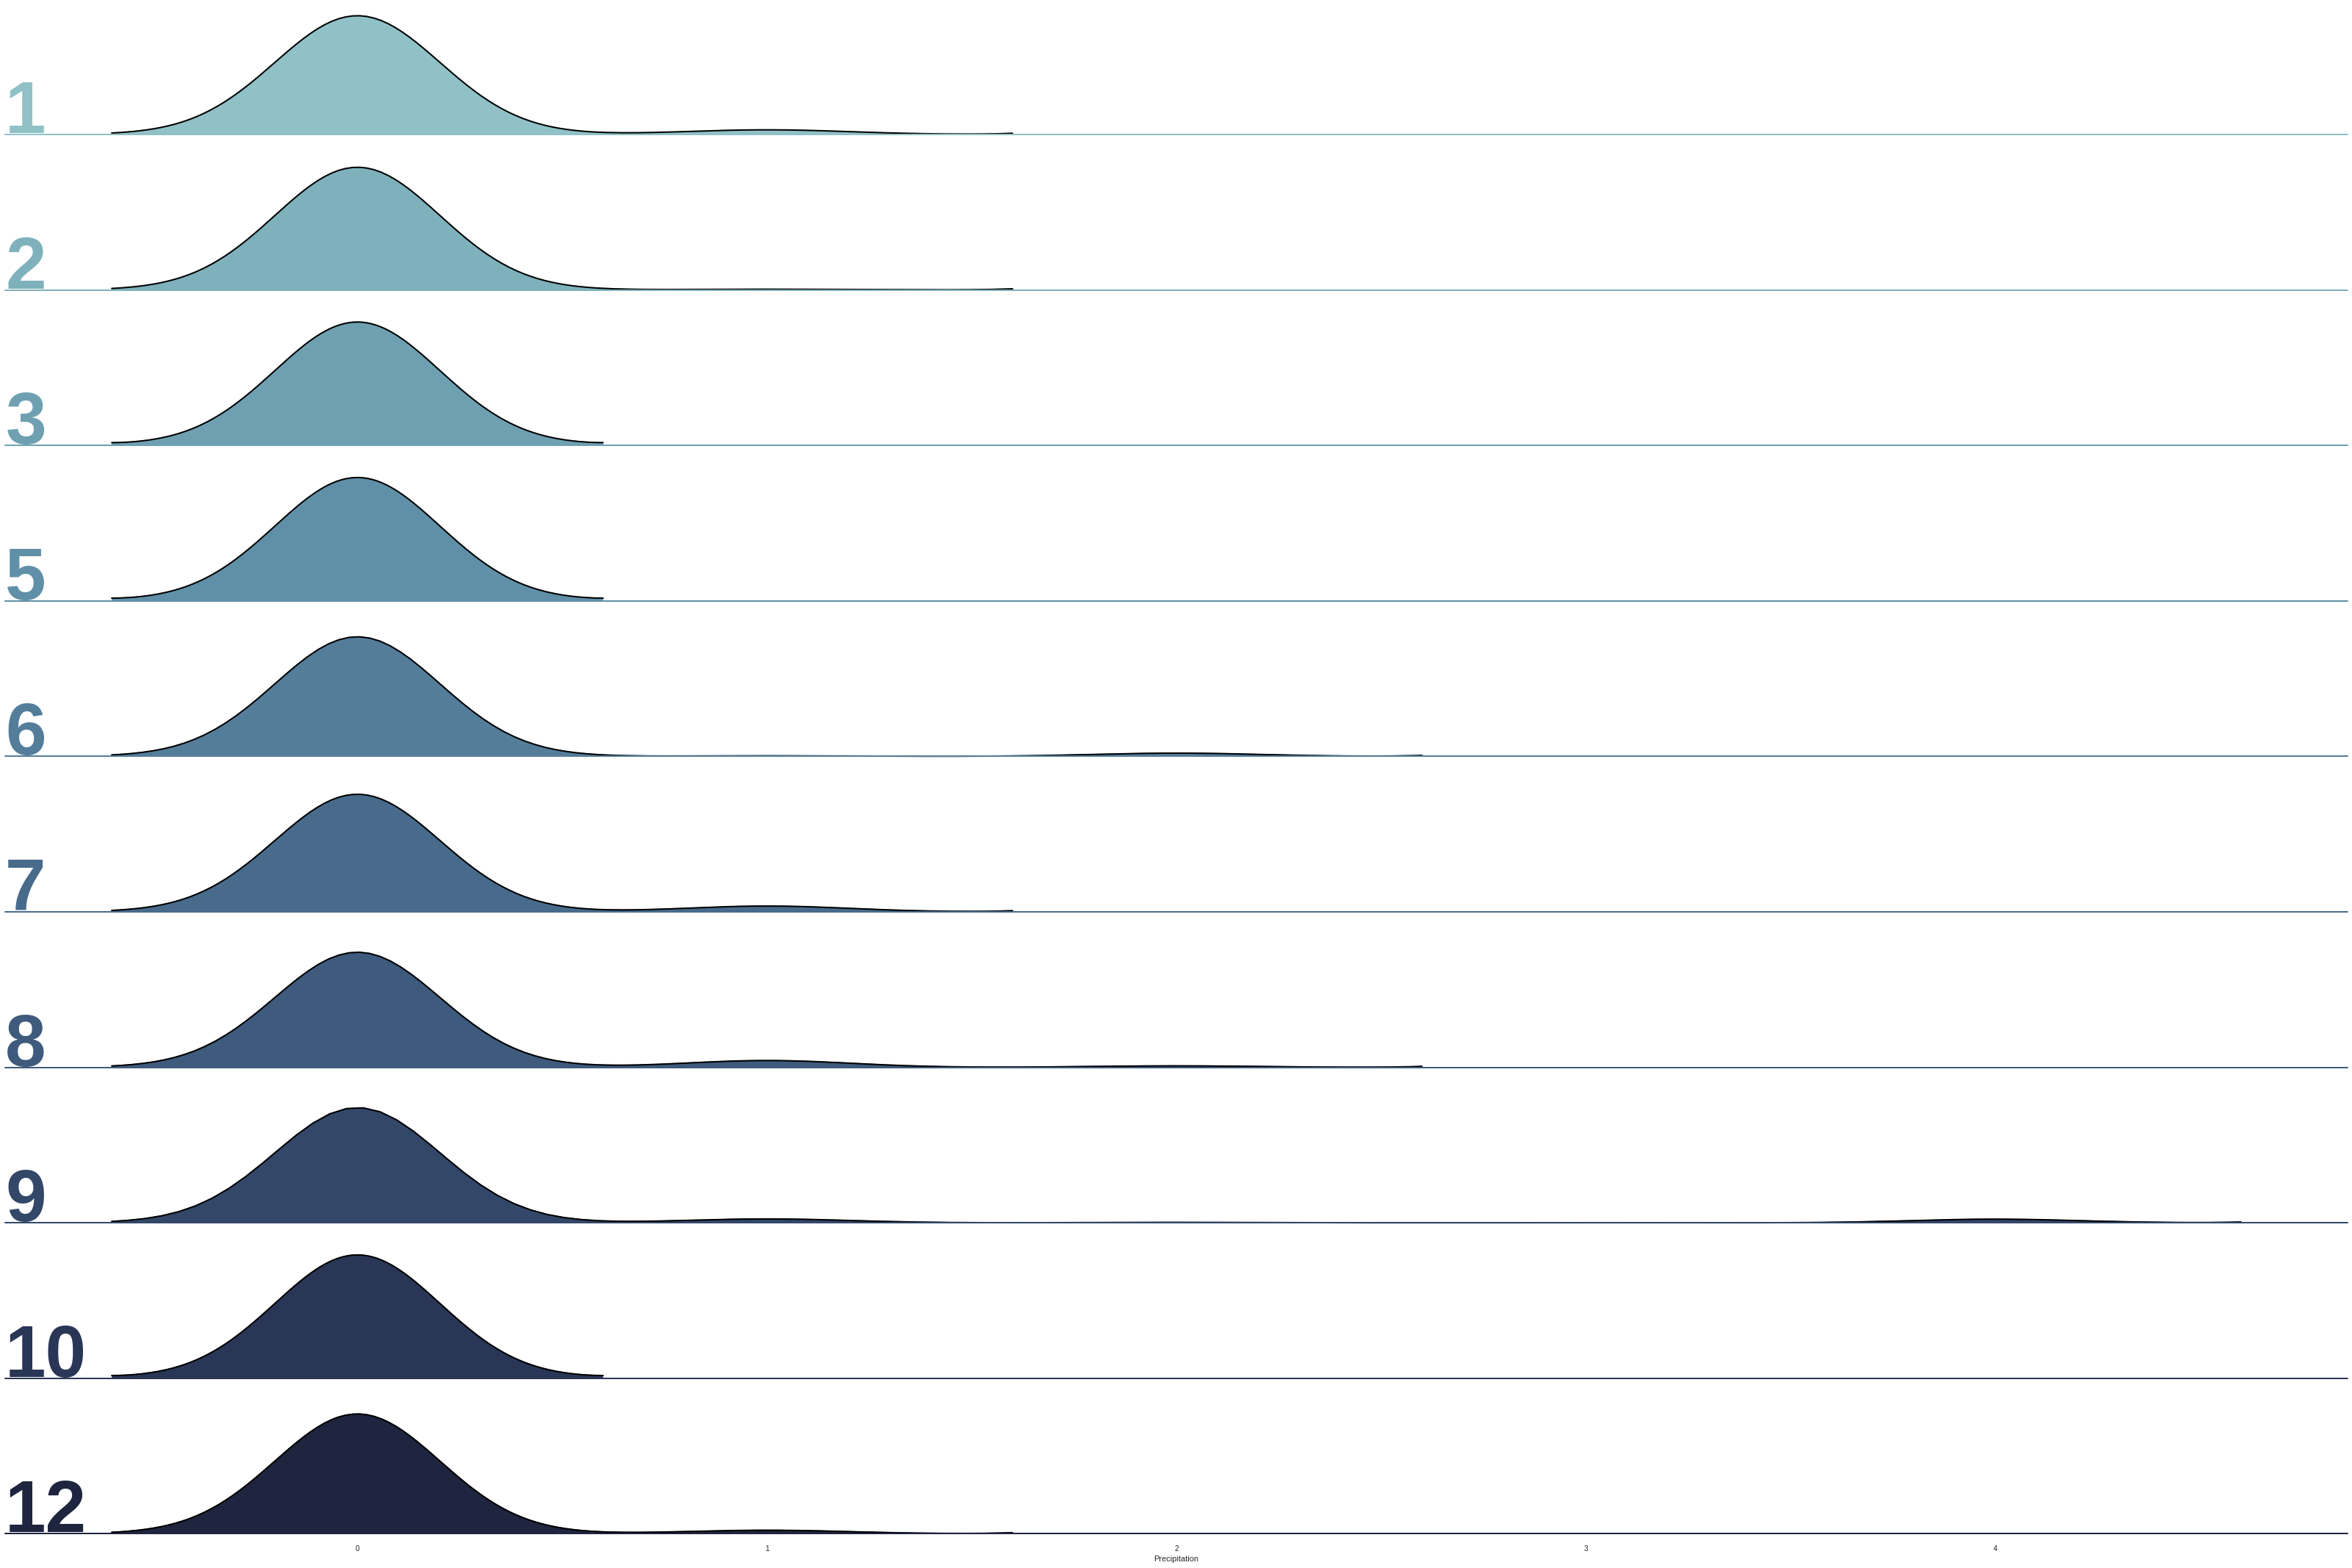

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

x = w['Daily Rain']
g = w['Date(Months)']
df = pd.DataFrame(dict(Precipitation=x, g=g))

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, palette=pal)

g.map(sns.kdeplot, "Precipitation", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Precipitation", clip_on=False, color="black", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace=-.25)

def lab(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontsize=100, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(lab, "Precipitation")

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

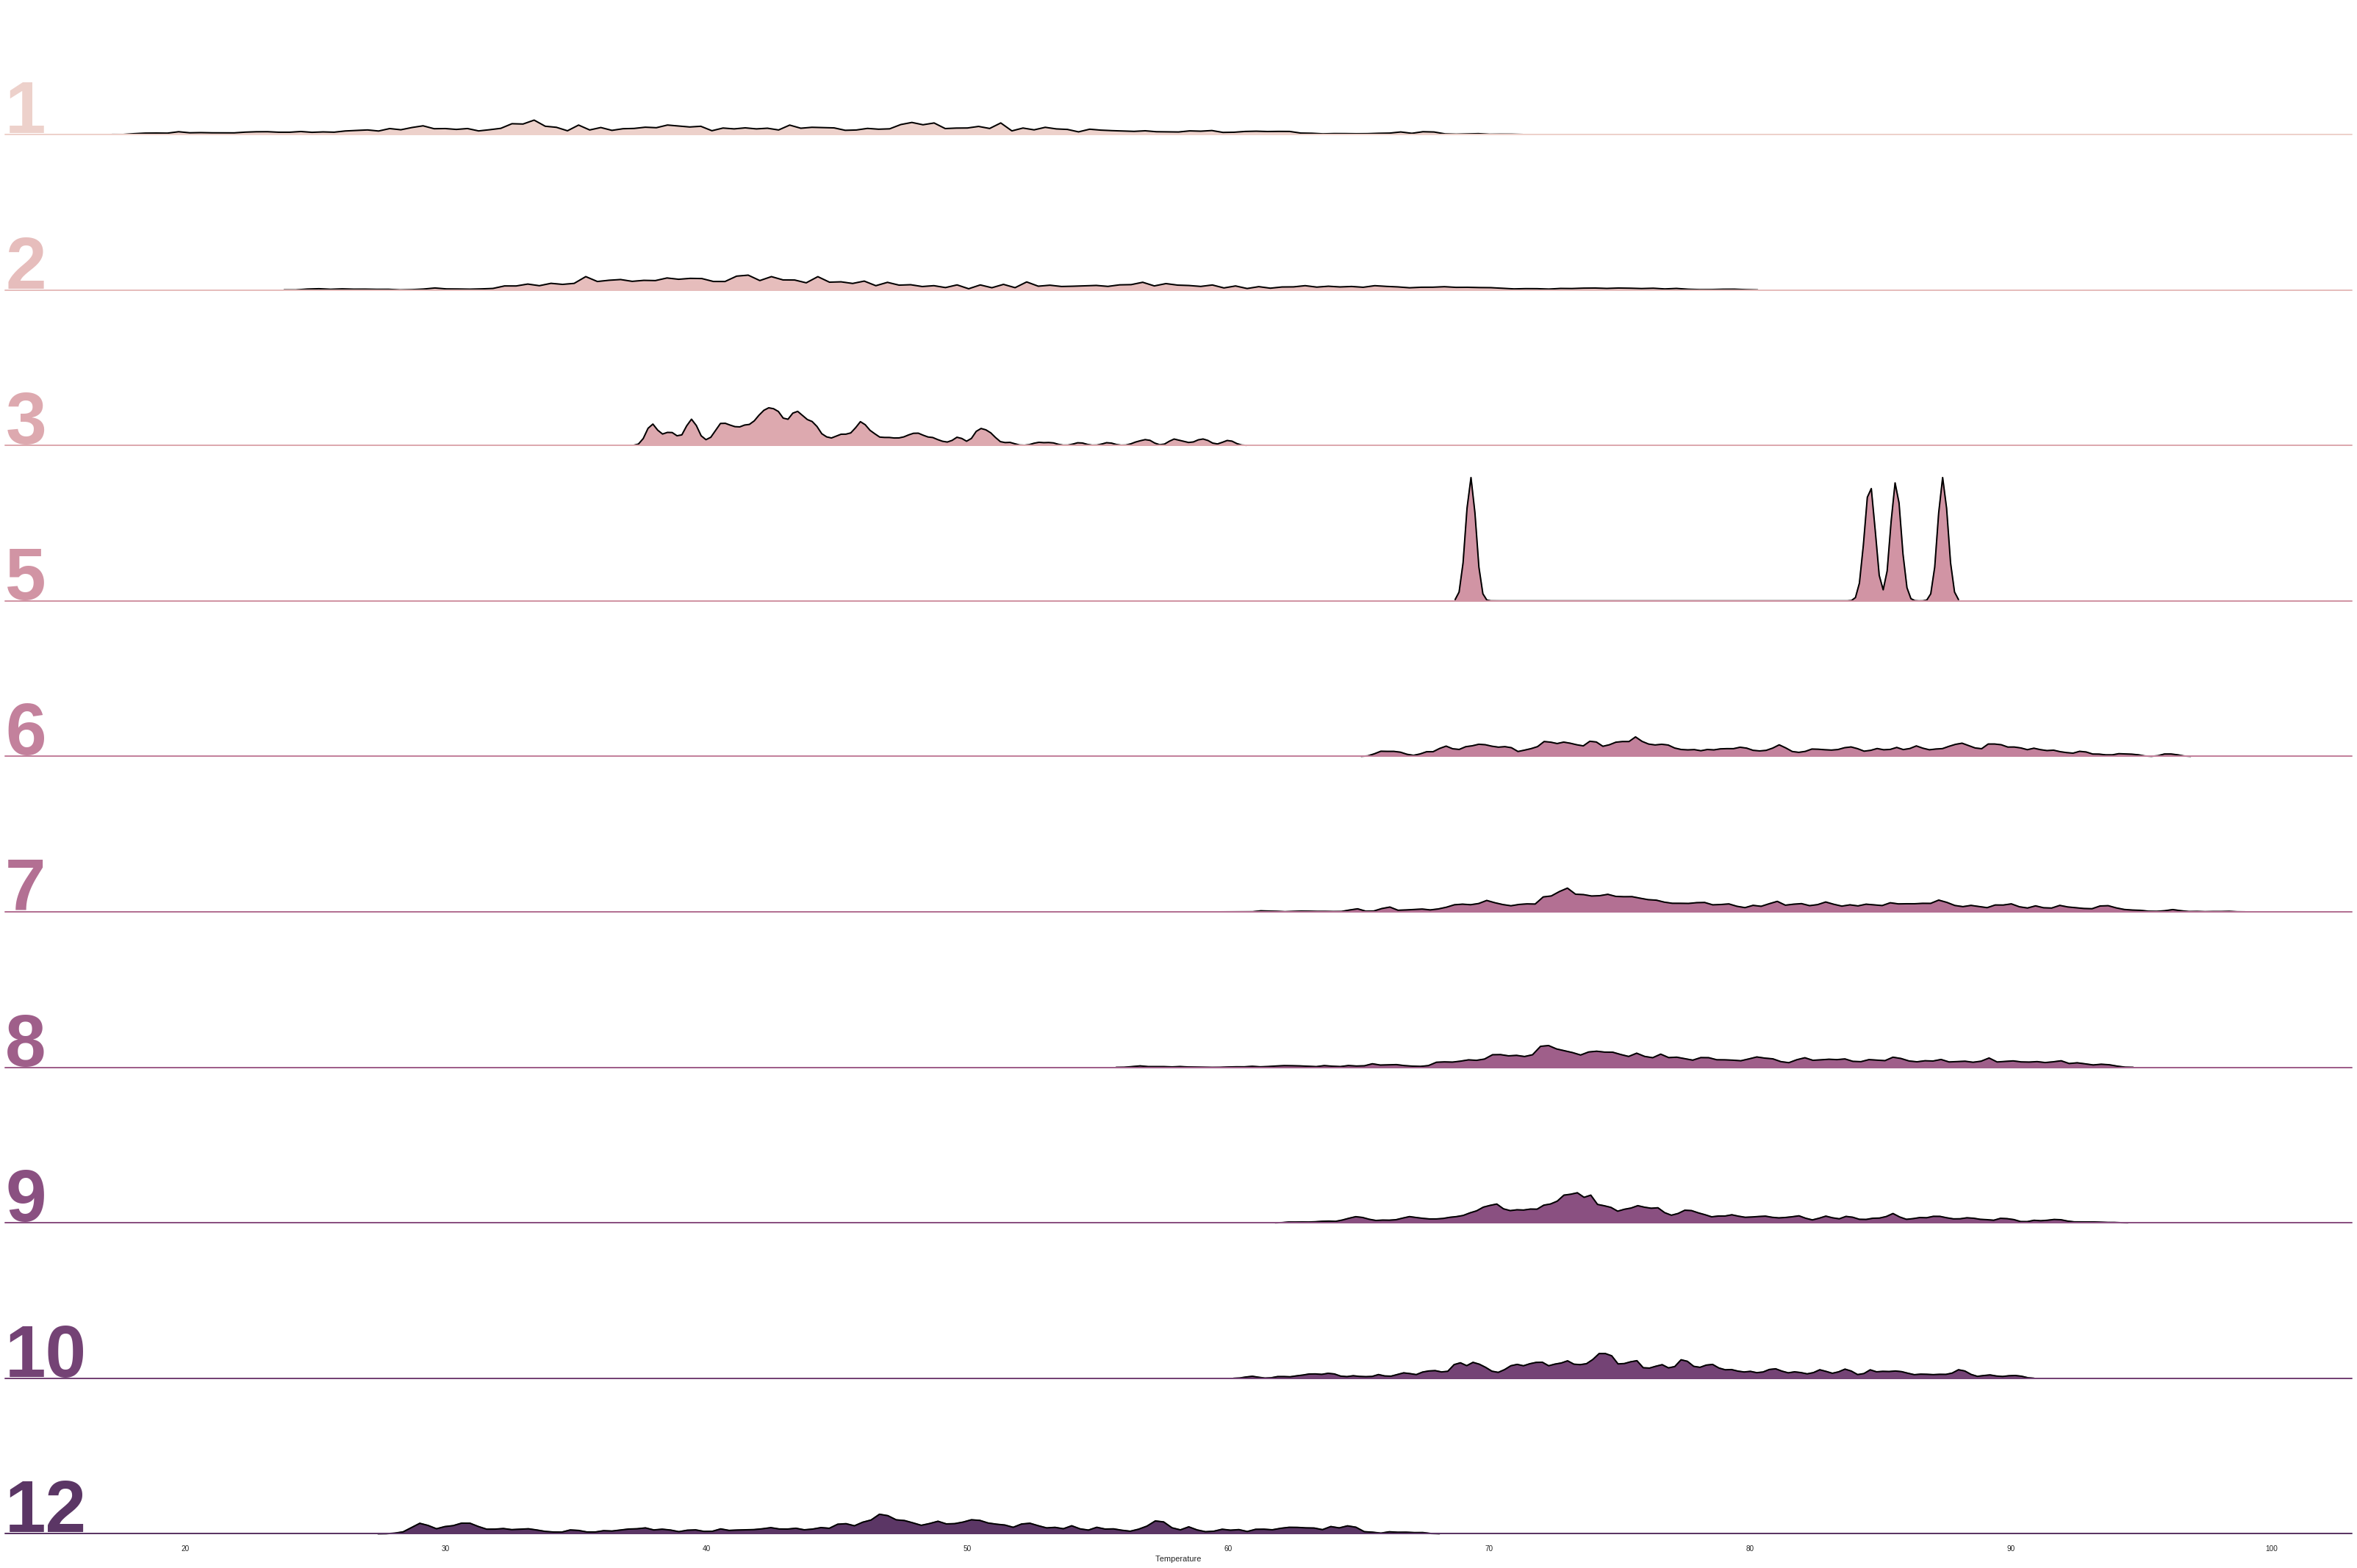

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

x = w['Temperature']
g = w['Date(Months)']
df = pd.DataFrame(dict(Temperature=x, g=g))

pal = sns.cubehelix_palette(n_colors=12)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, palette=pal)

g.map(sns.kdeplot, "Temperature", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Temperature", clip_on=False, color="black", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace=-.25)

def lab(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontsize=100, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(lab, "Temperature")

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

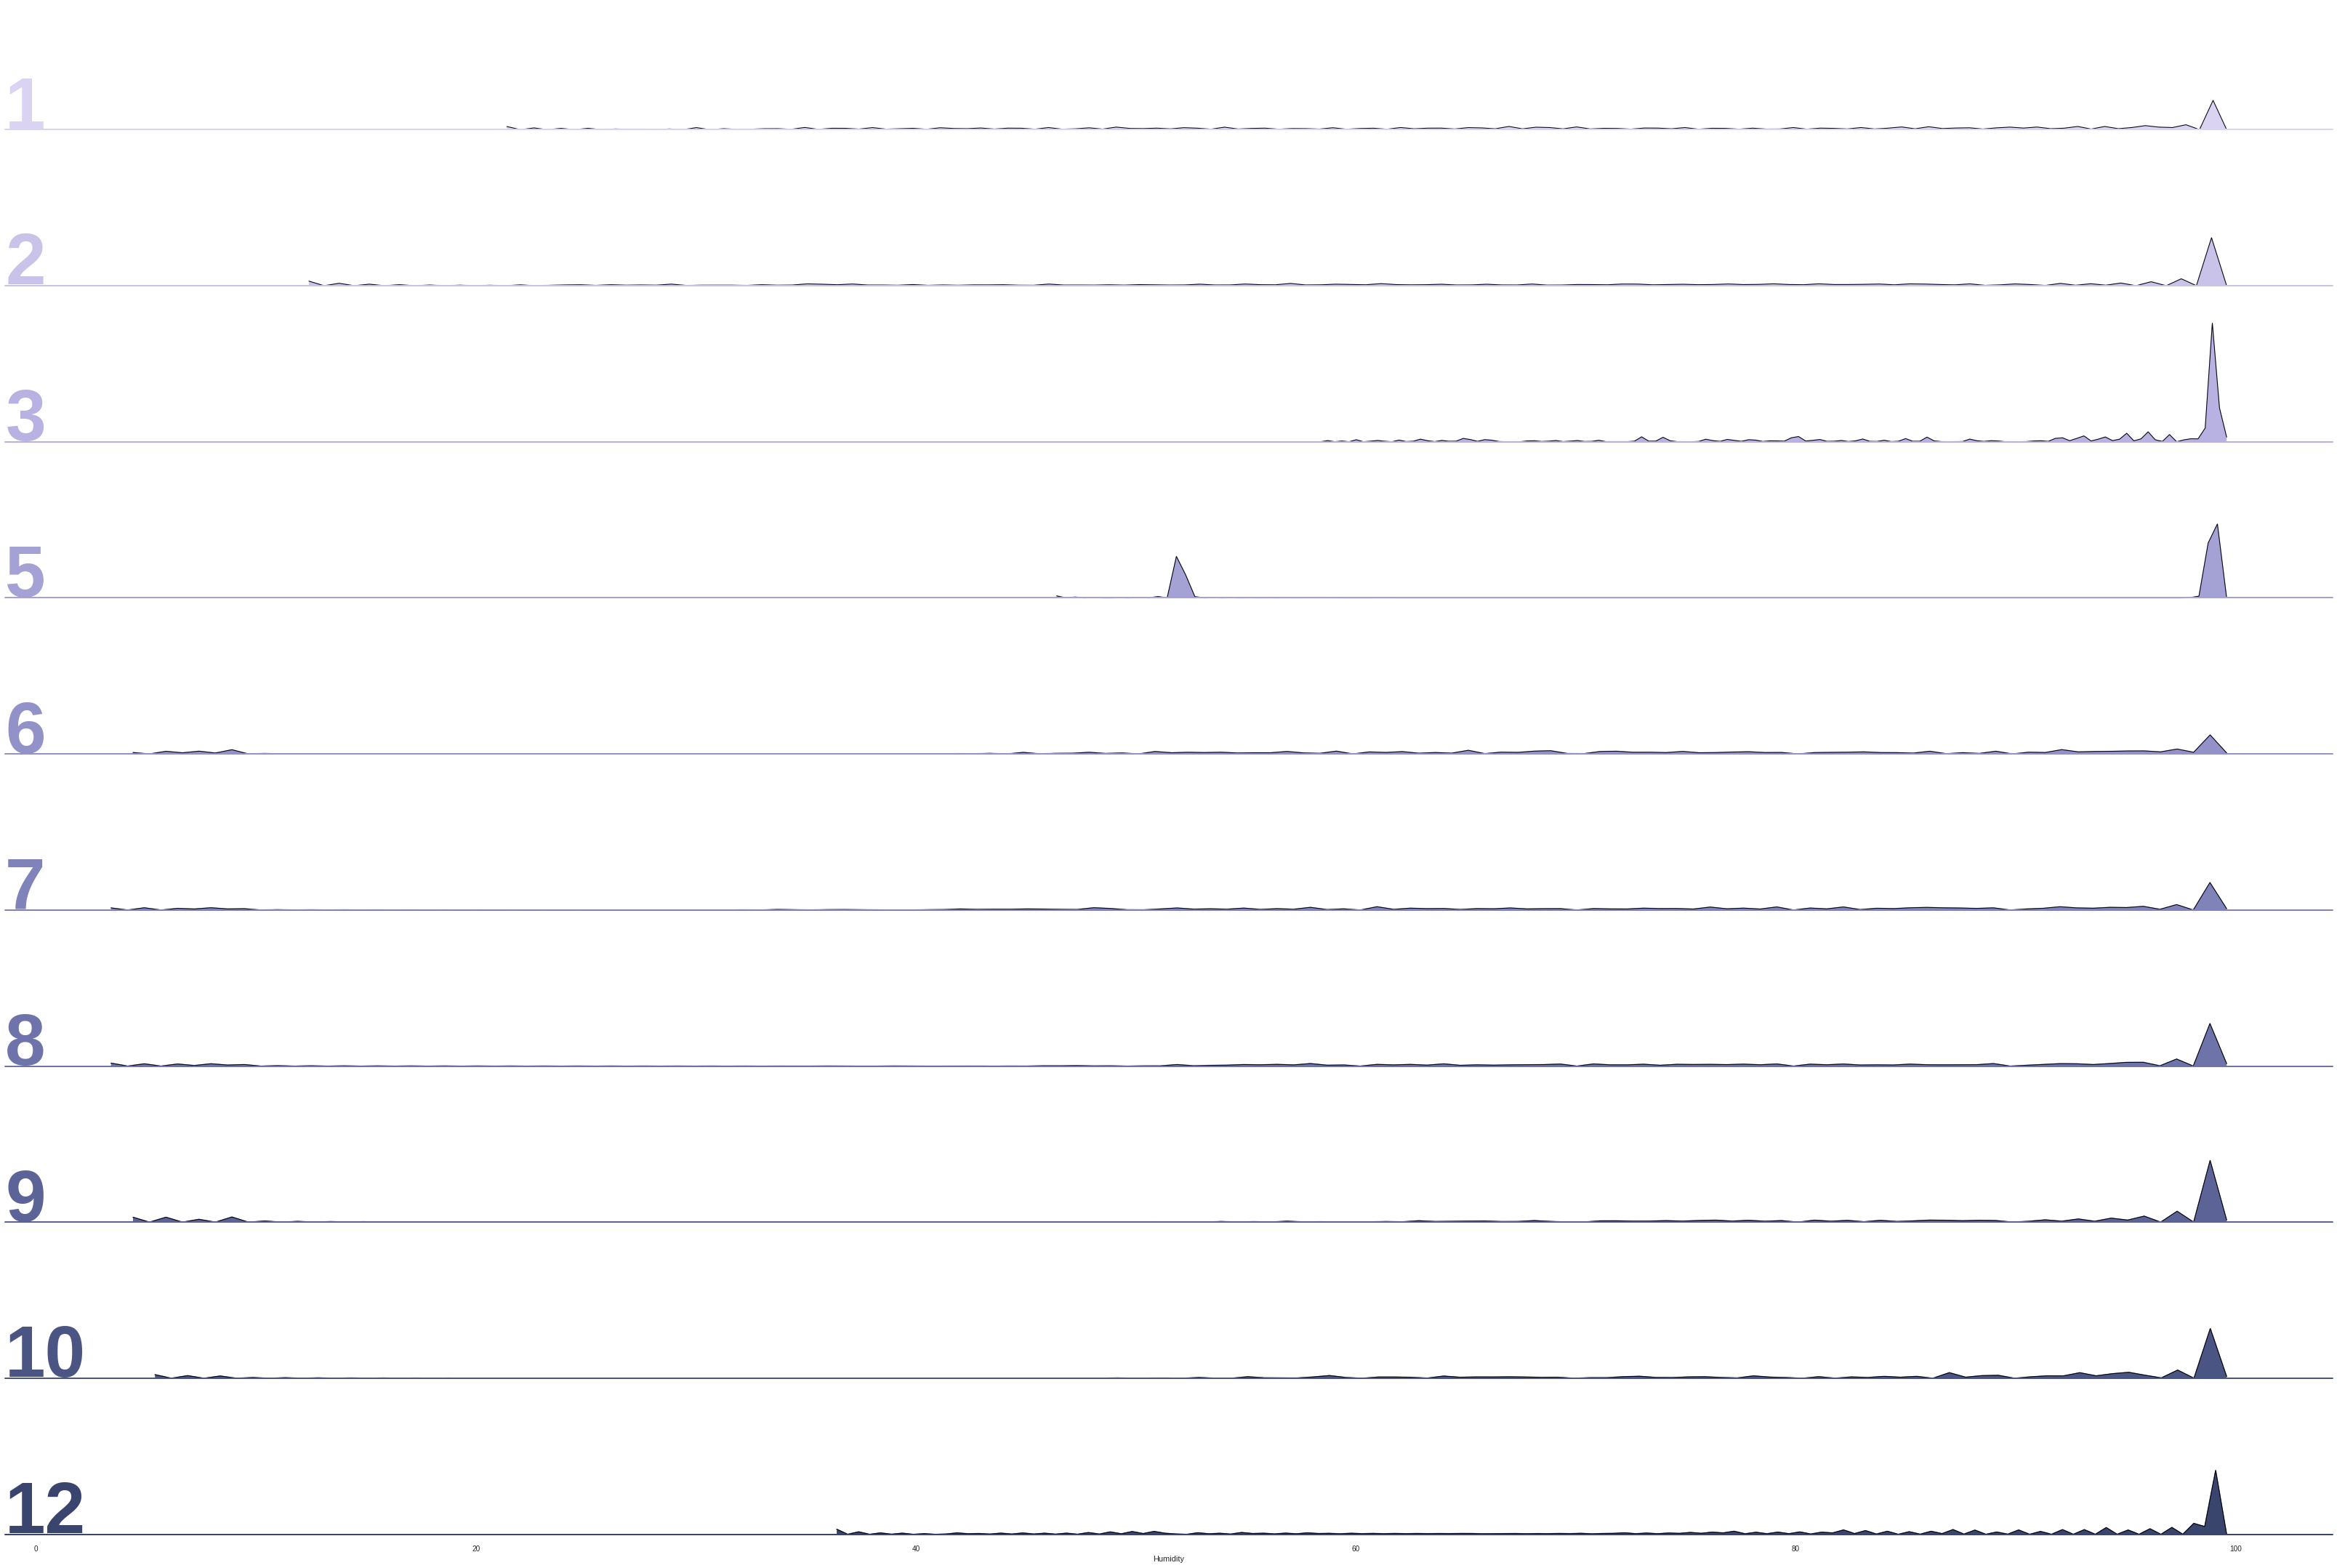

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

x = w['Humidity']
g = w['Date(Months)']
df = pd.DataFrame(dict(Humidity=x, g=g))

pal = sns.cubehelix_palette(start=2.8, rot=.1, n_colors=12)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, palette=pal)

g.map(sns.kdeplot, "Humidity", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Humidity", clip_on=False, color="black", lw=1, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace=-3)

def lab(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontsize=100, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(lab, "Humidity")

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

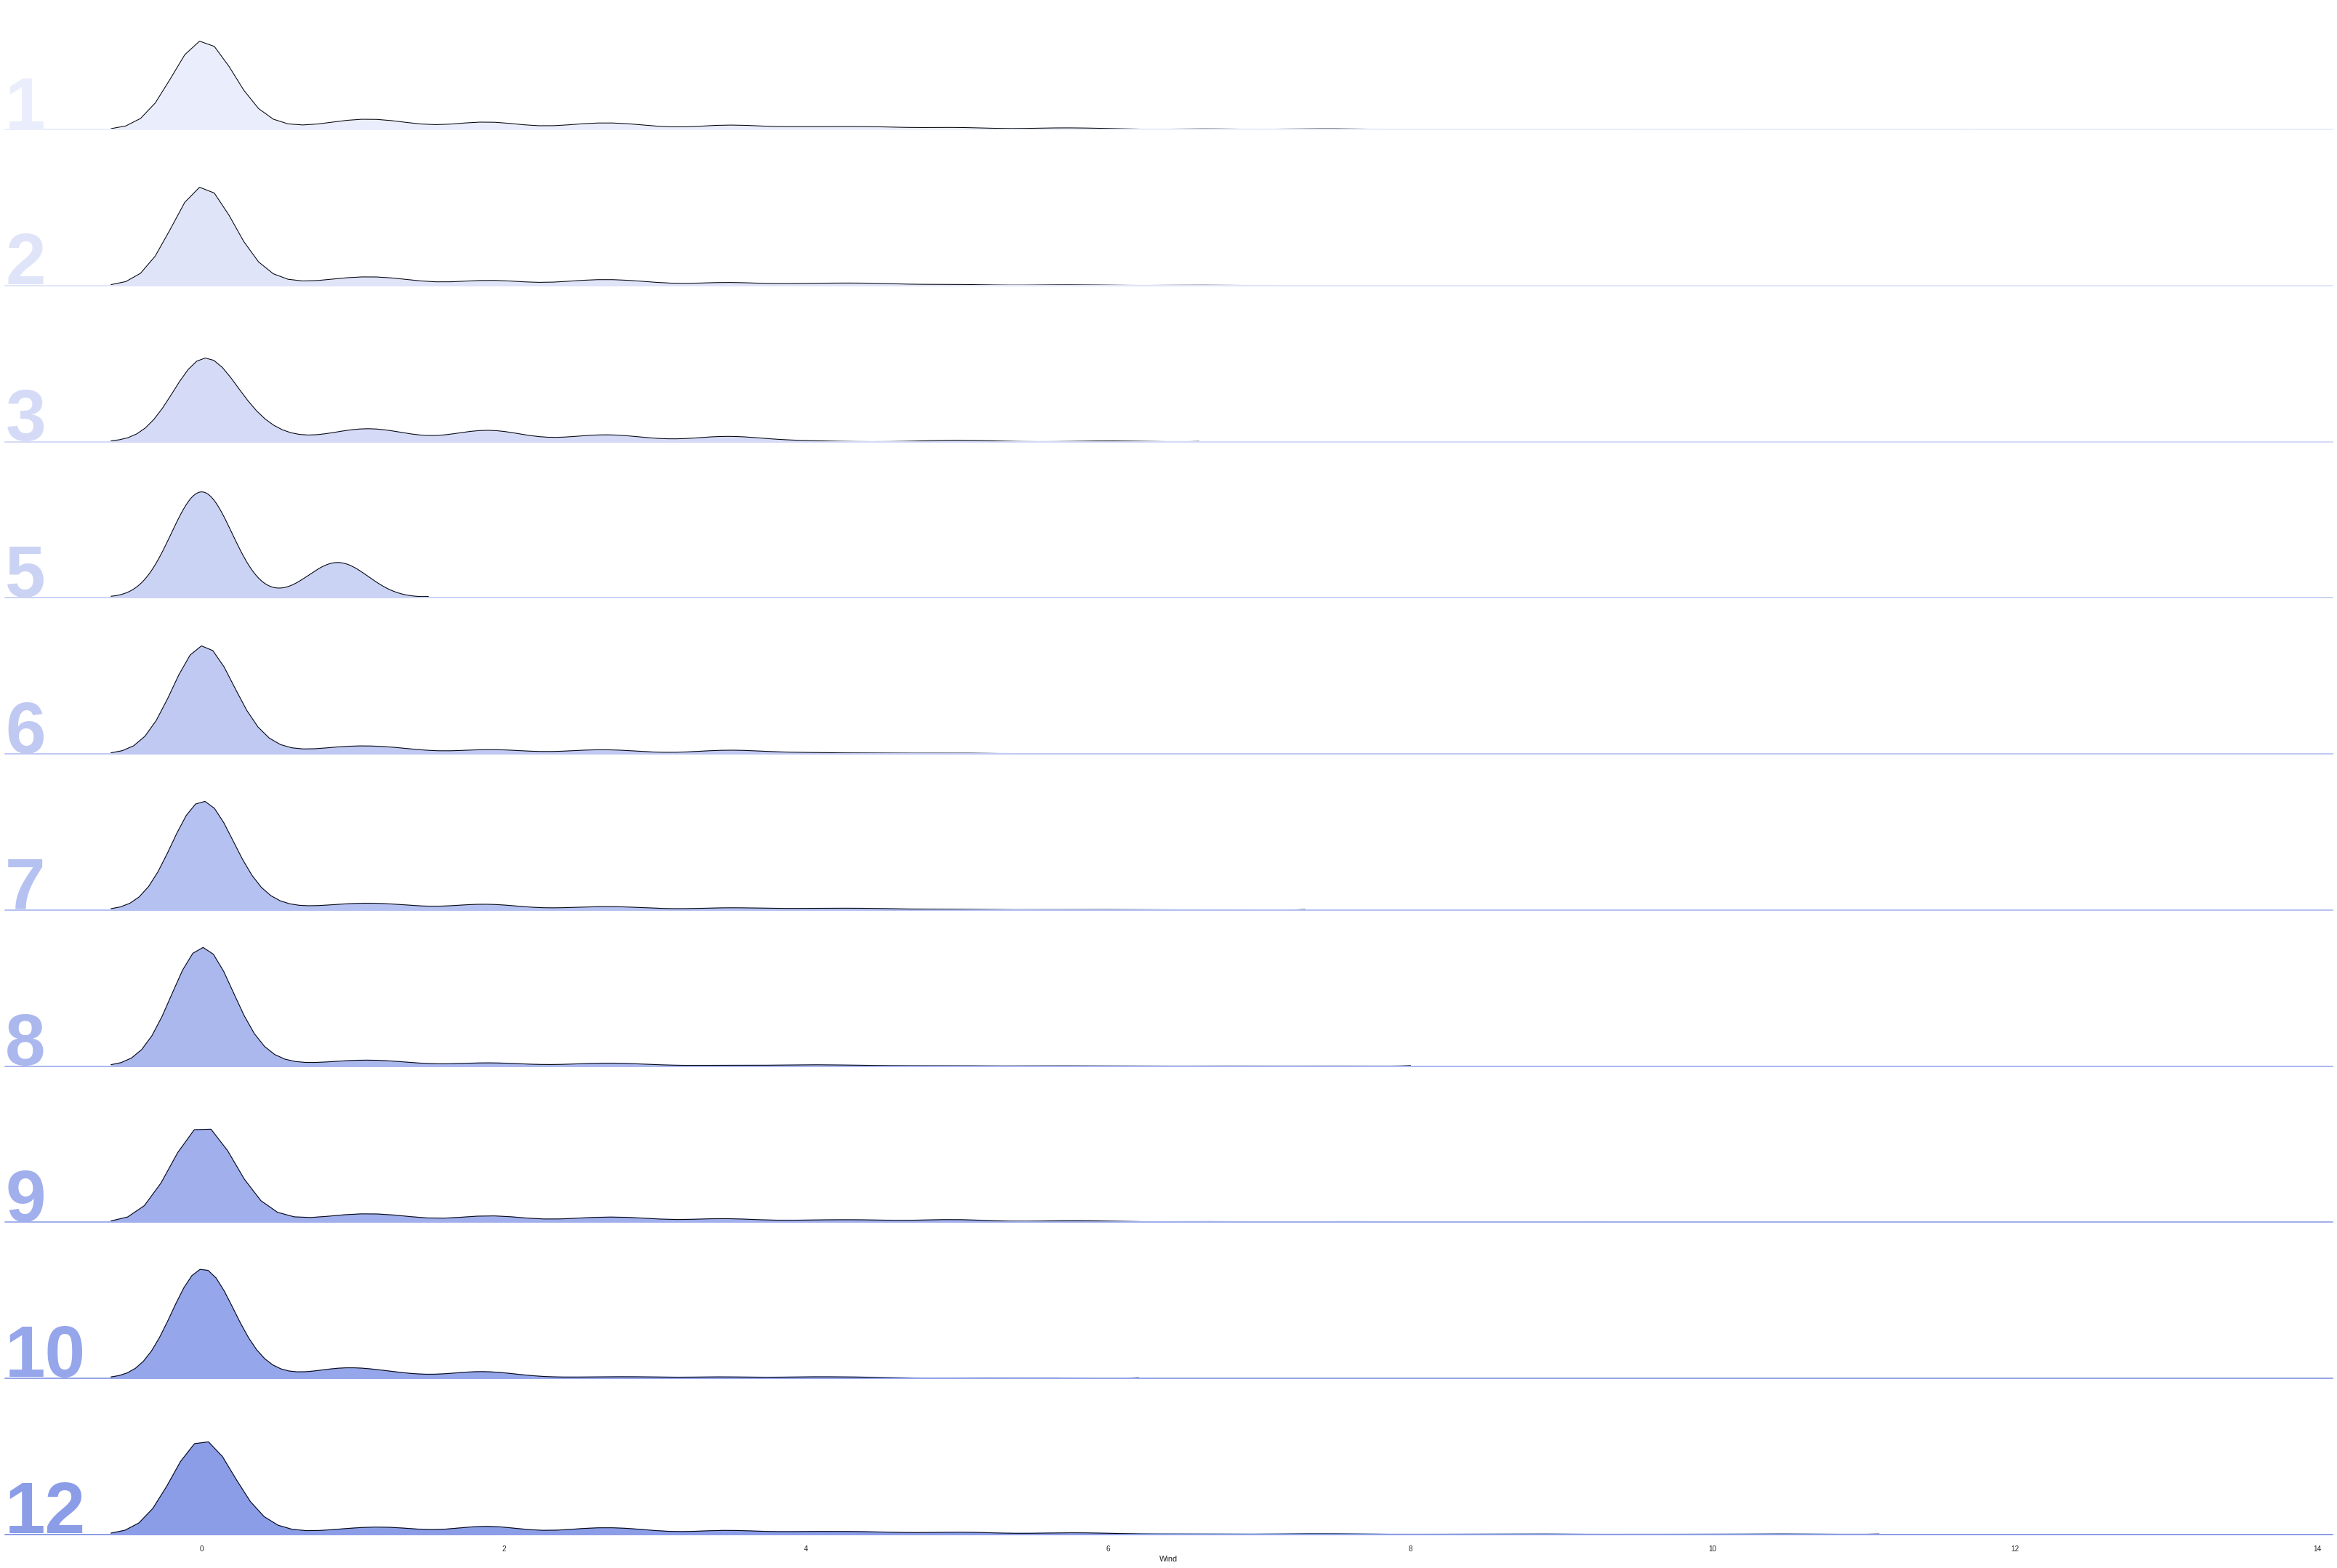

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

x = w['Wind Speed']
g = w['Date(Months)']
df = pd.DataFrame(dict(Wind=x, g=g))

pal = sns.light_palette((260, 75, 60), input="husl", n_colors=12)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, palette=pal)

g.map(sns.kdeplot, "Wind", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Wind", clip_on=False, color="black", lw=1, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)
g.fig.subplots_adjust(hspace=-3)

def lab(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontsize=100, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(lab, "Wind")

g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

y = w['Temperature']
x = [x for x in range(len(y))]

plt.figure(figsize=(20,8))
plt.plot(x, y, '-',color ='r')
plt.title("All Temperature Measurements taken in Chapel Hill")
plt.xlabel('All measurements taken (May 2018-March 2019)')
plt.ylabel('Temperature')
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np

y = w['Monthly Rain']
x = [x for x in range(len(y))]

plt.figure(figsize=(120,8))
plt.plot(x, y, '-')
plt.title("All Monthly Rain Measurements taken in Chapel Hill")
plt.xlabel('All measurements taken (May 2018-March 2019)')
plt.ylabel('Monthly Rain')
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np

y = w['Humidity']
x = [x for x in range(len(y))]

plt.figure(figsize=(100,8))
plt.plot(x, y, '-',color='b')
plt.title("All Humidity Measurements taken in Chapel Hill")
plt.xlabel('All measurements taken (May 2018-March 2019)')
plt.ylabel('Humidity')
plt.show()